# 1. 라이브러리 및 데이터

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style='whitegrid')

# warning 표시 무시
import warnings
warnings.filterwarnings('ignore')

데이터 출처: https://www.kaggle.com/datasets/mysarahmadbhat/hyundai-used-car-listing

한글 사용 위해 코드 실행

In [6]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -r

# 다운 후 런타임 다시 시작

In [2]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
# plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    rc('font', family = 'AppleGothic')

Text(0.5, 1.0, '한글')

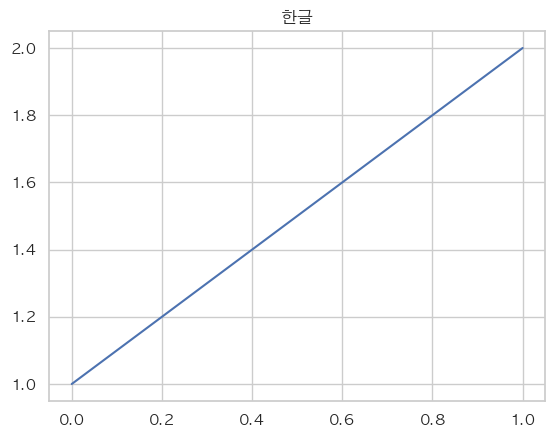

In [4]:
plt.plot([1,2])
plt.title('한글')

In [5]:
# df = pd.read_csv('/content/hyundi.csv')

In [6]:
df = pd.read_csv('hyundi.csv')

In [7]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


#2. 데이터 전처리

### 현대 중고 자동차 가격을 예측하기
가격 단위는 유로, tax는 파운드로 kaggle에서 단위 통일이 이루어지지 않음. tax는 price를 예측하는 하나의 지표 정도로만 이해하기

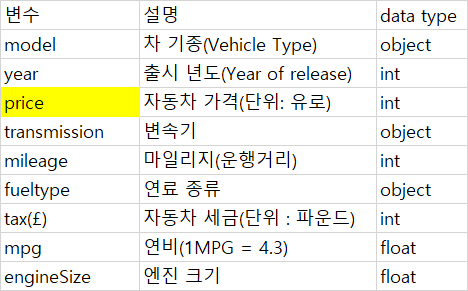

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [9]:
# 개수, 평균, 표준편차, 사분위수 조회
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


In [10]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4855,False,False,False,False,False,False,False,False,False
4856,False,False,False,False,False,False,False,False,False
4857,False,False,False,False,False,False,False,False,False
4858,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

* year(연도): 2000년 ~ 2020년까지 분포(2001년은 데이터 없음)
* mileage(운행거리): 1마일 ~ 138,000마일까지 분포
* null 값 존재하지 않음
* tax와 engineSize 에서 각각 0 값이 존재 -> 전처리필요

In [12]:
# 칼럼이름을 다루기 쉽게 tax(£) -> tax 로 변경
df = df.rename(columns={'tax(£)':'tax'})

In [13]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [14]:
df[df["engineSize"] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
31,Tucson,2015,15200,Automatic,28904,Diesel,200,46.3,0.0
32,I10,2014,7700,Automatic,8646,Petrol,160,45.6,0.0
33,I30,2017,10500,Automatic,17663,Diesel,20,72.4,0.0
34,I20,2017,11400,Automatic,12661,Petrol,145,44.1,0.0
37,I10,2018,9000,Manual,7126,Petrol,145,60.1,0.0
39,I10,2018,8500,Manual,12948,Petrol,145,60.1,0.0
40,I30,2019,14500,Manual,2481,Petrol,145,41.5,0.0
41,Tucson,2016,13800,Manual,27311,Diesel,30,61.7,0.0
42,I30,2016,9000,Manual,34443,Diesel,0,78.4,0.0
43,Tucson,2017,13800,Manual,16961,Diesel,30,61.7,0.0


In [15]:
# tax와 enginSize에서 0인 값을 nan으로 바꾸고 삭제
df["engineSize"]=df["engineSize"].replace(0,np.nan)
df["tax"]=df["tax"].replace(0,np.nan)

df.dropna(inplace = True)

In [16]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145.0,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235.0,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30.0,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20.0,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,Santa Fe,2019,29995,Semi-Auto,1567,Diesel,145.0,39.8,2.2
4856,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6


In [17]:
df.duplicated().sum()

85

In [18]:
# 중복값
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
282,Kona,2019,15498,Manual,10,Petrol,145.0,44.1,1.0
291,Kona,2019,15498,Manual,10,Petrol,145.0,44.1,1.0
505,I10,2014,5916,Manual,13281,Petrol,20.0,60.1,1.0
506,I10,2017,7101,Manual,1847,Petrol,20.0,60.1,1.0
714,I10,2014,5450,Manual,42346,Petrol,20.0,60.1,1.0
...,...,...,...,...,...,...,...,...,...
4157,Kona,2019,22995,Semi-Auto,10,Petrol,145.0,37.7,1.6
4227,Santa Fe,2019,32995,Semi-Auto,30,Diesel,145.0,40.9,2.2
4377,Tucson,2016,10991,Manual,108000,Diesel,125.0,58.9,2.0
4841,I40,2017,11485,Manual,17393,Diesel,145.0,65.7,1.7


In [19]:
# duplicates = df.duplicated(keep=False)
# grouped = df[duplicates].groupby(list(df.columns))
# for name, group in grouped:
#     print(name)
#     print(group)
#     print('---')

In [20]:
# 중복값 제거
# alpha = df.drop_duplicates()
# alpha
df.drop_duplicates(inplace = True)

In [21]:
# df

In [22]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145.0,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235.0,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30.0,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20.0,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,Santa Fe,2019,29995,Semi-Auto,1567,Diesel,145.0,39.8,2.2
4856,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6


#3. 데이터 시각화

### 상관계수
상관계수는 숫자 datatype만 계산 가능하므로 model, transmission, fuel type는 제외됨

In [23]:
corr = df.corr()
corr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.568002,-0.718656,0.234692,-0.145975,-0.042597
price,0.568002,1.000000,-0.436268,0.304096,-0.310004,0.555559
mileage,-0.718656,-0.436268,1.000000,-0.158413,0.139329,0.192463
tax,0.234692,0.304096,-0.158413,1.000000,-0.382185,0.260533
mpg,-0.145975,-0.310004,0.139329,-0.382185,1.000000,-0.258397
engineSize,-0.042597,0.555559,0.192463,0.260533,-0.258397,1.000000


In [24]:
# import matplotlib
# matplotlib.rcParams['axes.unicode_minus'] = False

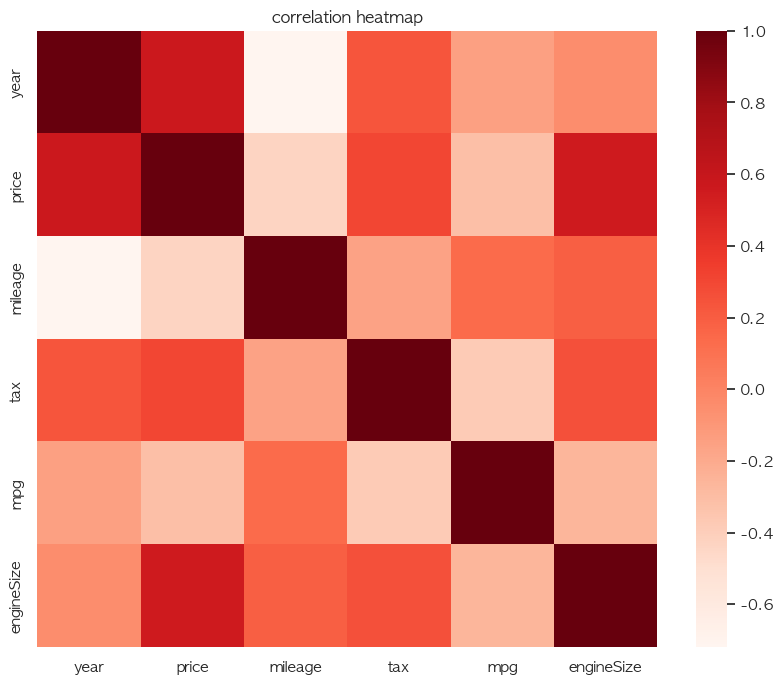

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.title("correlation heatmap")
plt.show()

* price와 양의 상관관계: year, engine size
* price와 음의 상관관계: mileage, mpg

### 차종

In [31]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145.0,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235.0,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30.0,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20.0,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,Santa Fe,2019,29995,Semi-Auto,1567,Diesel,145.0,39.8,2.2
4856,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6


In [30]:
df.groupby('model')['price'].mean()

model
 Accent       1295.000000
 Amica        1750.000000
 Getz         1927.500000
 I10          7723.844828
 I20          8848.288421
 I30         12550.097902
 I40         10657.714286
 I800        16663.263158
 IX20         8833.731343
 IX35         8265.582609
 Ioniq       18181.379032
 Kona        15634.257764
 Santa Fe    24189.258197
 Terracan     3092.500000
 Tucson      15769.978740
 Veloster     7031.666667
Name: price, dtype: float64

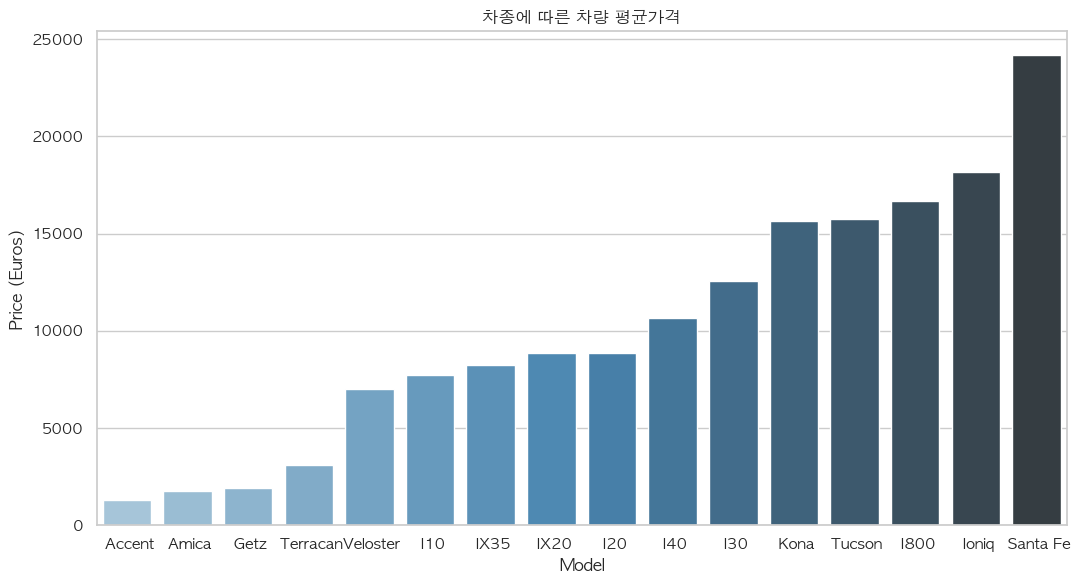

In [32]:
# 차종에 따른 평균가격
model_price = df.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(11,6))
plt.title("차종에 따른 차량 평균가격")
pal = sns.color_palette("Blues_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pal)

plt.xlabel("Model")
plt.ylabel("Price (Euros)")
plt.tight_layout()

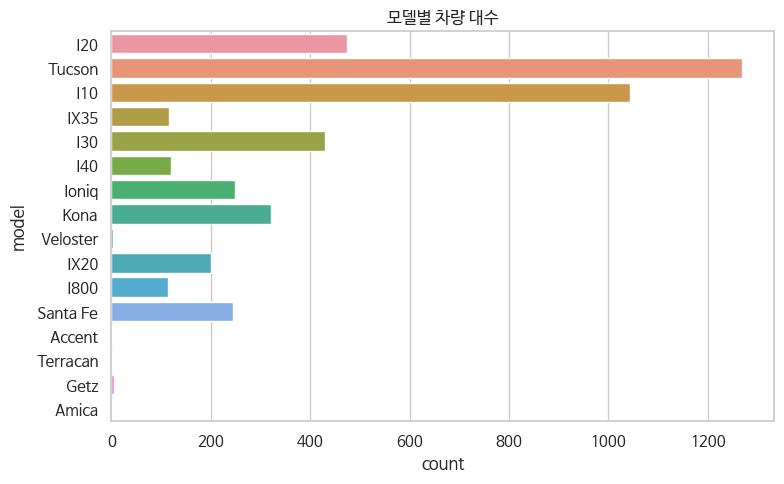

In [36]:
plt.figure(figsize=(8,5))
plt.title("모델별 차량 대수")
sns.countplot(y='model', data=df)
plt.tight_layout()

### 출시연도

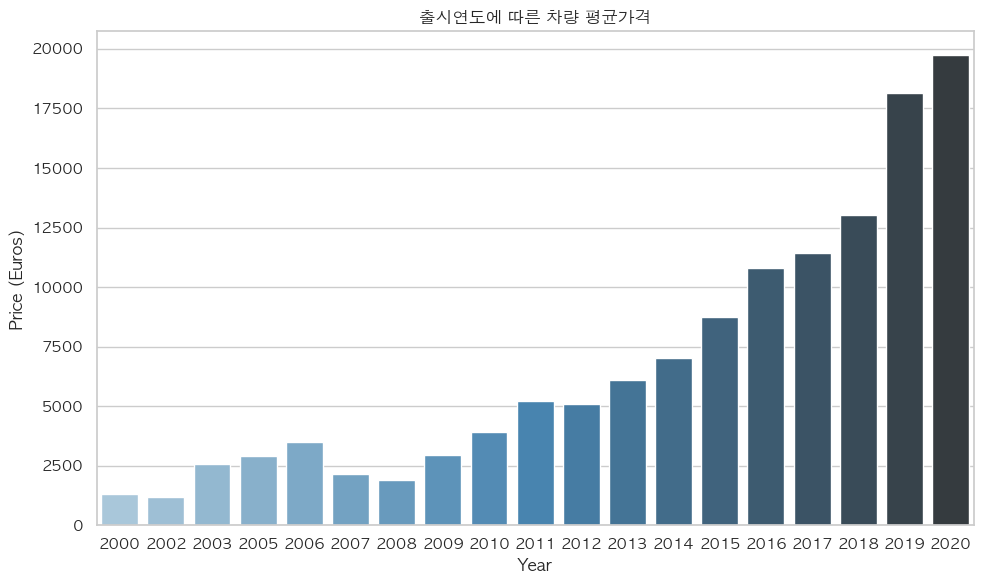

In [33]:
# 출시연도에 따른 평균가격
year_price = df.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.title("출시연도에 따른 차량 평균가격")
pal = sns.color_palette("Blues_d", len(year_price))

sns.barplot(x=year_price.index, y=year_price.values, palette=pal)

plt.xlabel("Year")
plt.ylabel("Price (Euros)")
plt.tight_layout()

### 변속기

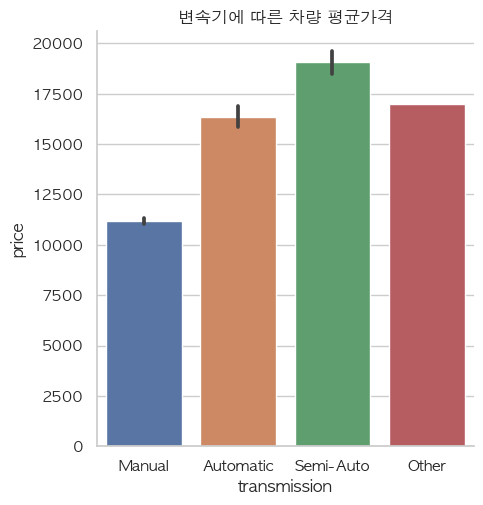

In [35]:
sns.catplot(x='transmission', y='price', kind='bar', data=df)
plt.title("변속기에 따른 차량 평균가격")
plt.show()

### 주행거리

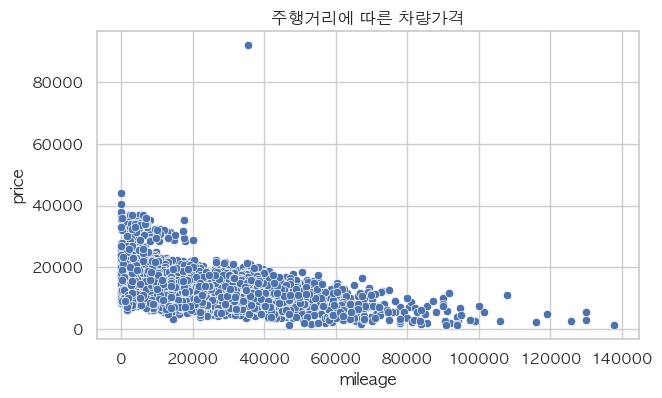

In [36]:
plt.figure(figsize=(7,4))
plt.title("주행거리에 따른 차량가격")
sns.scatterplot(x=df['mileage'], y=df['price'])
plt.show()

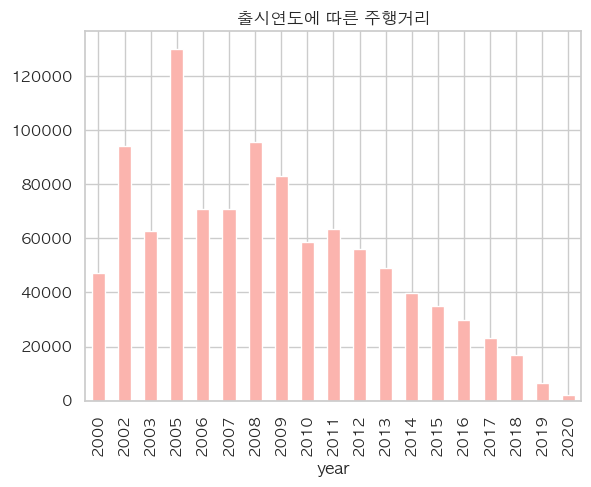

In [37]:
df.groupby('year')['mileage'].mean().plot.bar(cmap='Pastel1');
plt.title("출시연도에 따른 주행거리")
plt.show()

### 연료종류

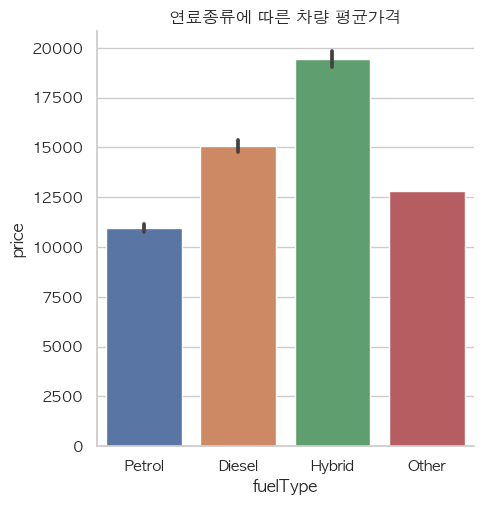

In [38]:
sns.catplot(x='fuelType', y='price', kind='bar', data=df)
plt.title("연료종류에 따른 차량 평균가격")
plt.show()

### 세금

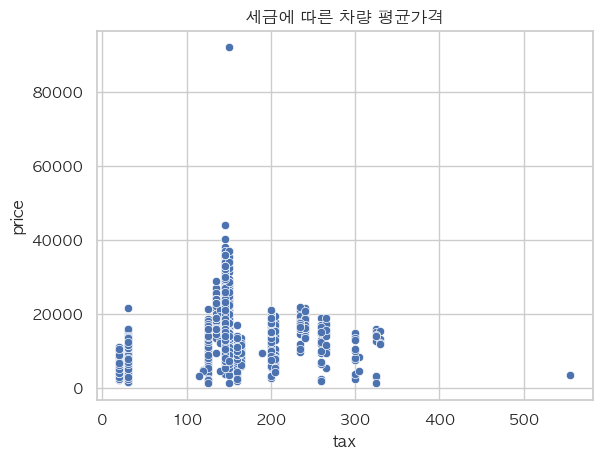

In [42]:
sns.scatterplot(data=df, x='tax', y='price')
plt.title("세금에 따른 차량 평균가격")
plt.show()

### 연비(mpg)

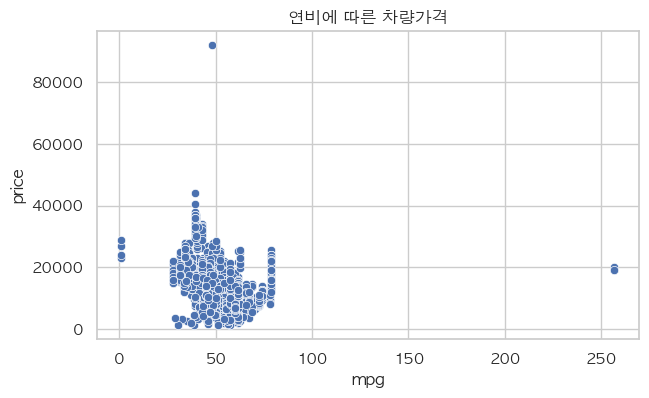

In [40]:
plt.figure(figsize=(7,4))
plt.title("연비에 따른 차량가격")
sns.scatterplot(x=df['mpg'], y=df['price'])
plt.show()

### 엔진크기

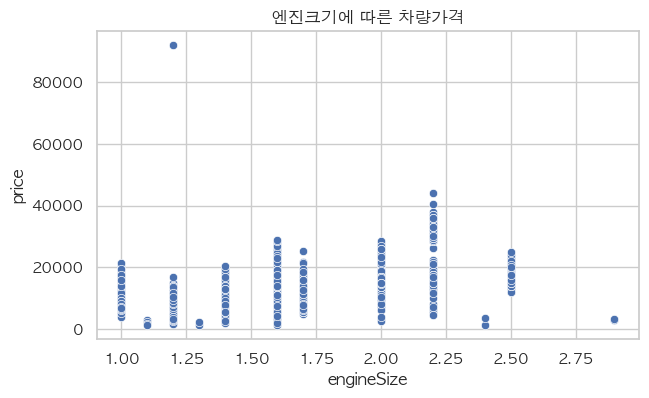

In [41]:
plt.figure(figsize=(7,4))
plt.title("엔진크기에 따른 차량가격")
sns.scatterplot(x=df['engineSize'], y=df['price'])
plt.show()

# 4. 시각화 내용 정리

mpg와 tax는 price와 약한 상관관계를 보인다.
이외의 변수 year, mileage, engineSize는 유의할만한 상관관계를 보인다.

주행거리, 세금, 연비, 엔진크기에 각각 outlier가 존재하므로 확인해야 한다.

데이터 크기가 작은 경우 엑셀로 빠르게 outlier을 체크하는 것이 좋다

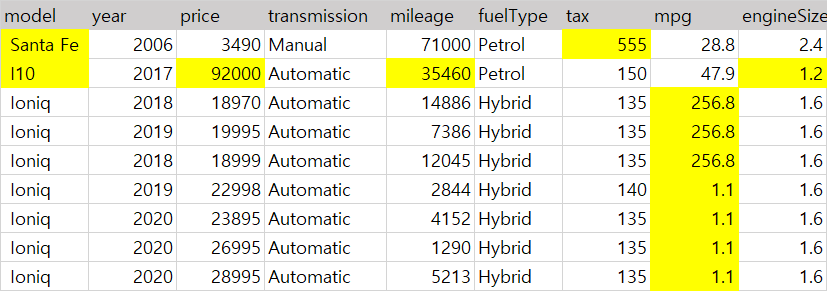

엑셀에서 outlier를 확인한 데이터로 노란색 부분이 outlier가 된 원인이다. 이 값을 모델에 넣을지 안 넣을지에 따라서 모델 성능이 달라질 수 있으므로 유의해야 한다.

Santa Fe와 I10은 제거를 하고 Ioniq은 값을 변경해 줄 예정이다. Ioniq은 전기차로 2020년 mpg는 62.8, 2019,2018년은 78.5로 변경할 것이다.

# 5. 이상치 제거 및 변환

### 행 제거

In [43]:
len(df)

4594

In [44]:
# 행 삭제하기 위해 조회
df[df['year'] == 2006]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4756,Santa Fe,2006,3490,Manual,71000,Petrol,555.0,28.8,2.4


In [45]:
# 찾은 행에서 index로 이동해 그 index에 속한 값만 지우기
df.drop(df[df['year'] == 2006].index, axis=0, inplace=True)
len(df)

4593

In [46]:
df[df['price'] == 92000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4247,I10,2017,92000,Automatic,35460,Petrol,150.0,47.9,1.2


In [47]:
df.drop(df[df['price'] == 92000].index, axis=0, inplace=True)
len(df)

4592

### 데이터 값 변환
Ioniq행을 변경하기 위해 동일한 방식으로 조회해보지만 되지 않아 str.contains 사용함 (모델명 앞에 공백 존재함)

In [49]:
df[df['model'] == ' Ioniq']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,Ioniq,2018,15000,Automatic,32227,Hybrid,135.0,78.5,1.6
74,Ioniq,2019,19800,Automatic,1963,Petrol,135.0,78.5,1.6
199,Ioniq,2019,20998,Automatic,5530,Hybrid,140.0,62.8,1.6
210,Ioniq,2019,22998,Automatic,2844,Hybrid,140.0,1.1,1.6
255,Ioniq,2018,17298,Automatic,19348,Hybrid,135.0,78.5,1.6
...,...,...,...,...,...,...,...,...,...
4791,Ioniq,2018,15998,Automatic,19054,Hybrid,135.0,78.5,1.6
4795,Ioniq,2017,15995,Automatic,18436,Hybrid,135.0,78.5,1.6
4806,Ioniq,2020,28995,Automatic,5213,Hybrid,135.0,1.1,1.6
4807,Ioniq,2019,18995,Automatic,4500,Hybrid,135.0,78.5,1.6


In [51]:
df[(df['model'].str.contains('Ioniq')) & (df['mpg'] == 256.8)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1213,Ioniq,2018,18970,Automatic,14886,Hybrid,135.0,256.8,1.6
2088,Ioniq,2019,19995,Automatic,7386,Hybrid,135.0,256.8,1.6
2215,Ioniq,2018,18999,Automatic,12045,Hybrid,135.0,256.8,1.6


In [52]:
df[(df['model'].str.contains('Ioniq')) & (df['mpg'] == 256.8)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1213,Ioniq,2018,18970,Automatic,14886,Hybrid,135.0,256.8,1.6
2088,Ioniq,2019,19995,Automatic,7386,Hybrid,135.0,256.8,1.6
2215,Ioniq,2018,18999,Automatic,12045,Hybrid,135.0,256.8,1.6


In [54]:
df[(df['model'].str.contains('Ioniq')) & (df['mpg'] == 256.8)]['mpg']

1213    256.8
2088    256.8
2215    256.8
Name: mpg, dtype: float64

In [55]:
temp_mask = (df['model'].str.contains('Ioniq')) & (df['mpg'] == 256.8)

In [56]:
df.loc[temp_mask, 'mpg'] = 78.5

In [57]:
temp_mask1 = ((df['model'].str.contains('Ioniq')) & (df['mpg'] == 1.1) & (df['year'] == 2019))
temp_mask2 = ((df['model'].str.contains('Ioniq')) & (df['mpg'] == 1.1) & (df['year'] == 2020))

In [58]:
df.loc[temp_mask1, 'mpg'] = 78.5
df.loc[temp_mask2, 'mpg'] = 62.8

In [59]:
# 이상치 없음
df['mpg'].value_counts()

60.1    503
61.7    383
57.6    316
78.5    218
57.7    200
44.1    189
34.9    171
44.8    157
50.4    142
46.3    139
52.3    132
47.9    129
58.9    126
47.1    109
55.4    108
56.5    100
61.4     92
48.7     78
36.2     71
53.3     71
39.2     71
62.8     69
49.6     65
34.0     61
43.5     61
54.3     60
42.8     59
41.5     59
45.6     57
51.4     55
39.8     51
65.7     50
74.3     47
37.7     42
31.7     41
42.2     39
35.3     36
28.0     32
72.4     32
67.3     26
64.2     23
38.7     21
33.6     20
43.6     17
35.8     16
68.9     12
37.2     10
40.4      5
78.4      5
40.9      4
46.0      4
34.5      3
32.8      2
70.6      1
38.2      1
30.4      1
Name: mpg, dtype: int64

# 6. 범주형 데이터 자료 변환

모델에 넣기 위해서는 model, transmission, fuelType의 범주형 데이터를 숫자형 데이터로 변경해주어야 한다. 그 방법으로
1. price에 따른 임의의 점수로 변경한다. ex) 가격이 높은 I10을 10으로 가격이 낮은 다른 모델을 0으로 인코딩한다
2. one-hot encoding:  fuelType은 총 4가지가 존재하는데 이 fuelType 4가지(manual automatic other semi-auto)로 나눠 각각에 0과 1을 할당한다
3. 또는 범주형 데이터를 모델에 사용하지 않을 수 있다.

* 이 방법중 1번을 택할 예정이다.

#### 차종(model)

In [53]:
# 차종 평균 가격대에 따른 변환
df.groupby('model')['price'].mean().to_frame('price').sort_values(by='price', ascending=False)

,price
model,
Santa Fe,24274.440329
Ioniq,18181.379032
I800,16663.263158
Tucson,15769.978740
Kona,15634.257764
I30,12550.097902
I40,10657.714286
I20,8848.288421
IX20,8833.731343


In [54]:
print(df['model'][0])

 I20


In [55]:
# 모델명 앞 공백 지워주기
model_name = []
for i in df['model']:
    model_name.append(i.strip())

In [56]:
df = df.assign(model=model_name)

In [57]:
df['model']

0            I20
1         Tucson
2         Tucson
3            I10
4           IX35
          ...   
4854    Santa Fe
4856         I40
4857         I10
4858      Tucson
4859      Tucson
Name: model, Length: 4592, dtype: object

차종의 평균가격이 높은 순으로 15에서 1씩 낮춰서 점수 할당

In [58]:
df['model'] = df['model'].map({'Santa Fe':15, 'Ioniq':14, 'I800':13, 'Tucson':12, 'Kona':11, 'I30':10, 'I40':9, 'IX20':8,
                                         'I20':7, 'IX35':6, 'I10':5, 'Veloster':4, 'Terracan':3, 'Getz':2, 'Amica':1, 'Accent':0})

df['model']

0        7
1       12
2       12
3        5
4        6
        ..
4854    15
4856     9
4857     5
4858    12
4859    12
Name: model, Length: 4592, dtype: int64

#### 변속기(transmission)

변속기에 따른 평균가격이 높은 순으로 3에서 1씩 낮춰서 점수 할당

In [59]:
df.groupby('transmission')['price'].mean().to_frame('price').sort_values(by='price', ascending=False)

,price
transmission,
Semi-Auto,19071.190813
Other,16995.000000
Automatic,16244.019108
Manual,11172.139241


In [60]:
df['transmission'] = df['transmission'].map({'Semi-Auto':3, 'Automatic':2, 'Other':1, 'Manual':0})

#### 연료타입(fuelType)

연료타입에 따른 평균가격이 높은 순으로 3에서 1씩 낮춰서 점수 할당

In [61]:
df.groupby('fuelType')['price'].mean().to_frame('price').sort_values(by='price', ascending=False)

,price
fuelType,
Hybrid,19456.118211
Diesel,15084.049458
Other,12800.000000
Petrol,10919.938615


In [62]:
df['fuelType'] = df['fuelType'].map({'Hybrid':3, 'Diesel':2, 'Other':1, 'Petrol':0})

In [63]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [64]:
# 다음 학습을 위해 전처리 진행한 데이터 저장
df.to_csv('hyundi_preprocessed.csv')